<h1>Examples.ThermodynamicCycles.OttoCycleIdeal00_ex01</h1>

<h1>Load modules </h1>

In [1]:
#****************************************
#    User must NOT edit code below 
#****************************************
import OMPython
from OMPython import OMCSessionZMQ

import os
from os.path import expanduser

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import pathlib

from IPython.display import display, HTML
print('------------------------------')

------------------------------


<h1>Use settings</h1>
<p>Edit the strings below </p>

In [2]:
dirWorkRelToHome='/OMPythonWork'

#dirModelRelToLibDir='/Examples/ThermodynamicCycles'
fullpathModel='PropulsionSystem.Examples.ThermodynamicCycles.OttoCycleIdeal00_ex01'
nmModel='OttoCycleIdeal00_ex01'
stopTime=70.0
outputFormat='csv'
print('------------------------------')

------------------------------


<h1>Setup </h1>

In [3]:
#****************************************
#    User must NOT edit code below 
#****************************************
#*** get directory of this notebook
sys.path.append('..')
pathNotebook= os.getcwd()

#*** distinguish OS
if(os.name=='nt'):
    dirHome=expanduser("~")
    typeOS='Windows (nt)'
elif(os.name=='posix'):
    dirHome=os.environ['HOME']
    typeOS= 'Linux or Mac (posix)'
##### end if #####

#*** direcotory of temporary work
dirWork= dirHome + dirWorkRelToHome

#*** get library directory
sys.path.append('..')
dirLib= pathlib.Path('../')
dirLib= dirLib.resolve()

#*** get direcotry of model to run
#dirModel= str(dirLib) + dirModelRelToLibDir

#fullpathModelFile= dirModel + '/' + nmModel + ".mo"

print("########## check user settings and related info. ##########")
print('-. This OS is: ' + typeOS)
print('-. Home directory of current environment is: ' + dirHome)
print("-. Temporary Working directory is: "+str(dirWork))
print('')
print('-. Directory of This notebook: '+ pathNotebook)
print('-. Directory of library is: ' + str(dirLib))
#print("-. Directory of model to be run: " + dirModel)
print("-. Full path of Model to be ran is: " + fullpathModel)
print('------------------------------')

########## check user settings and related info. ##########
-. This OS is: Windows (nt)
-. Home directory of current environment is: C:\Users\grabacr
-. Temporary Working directory is: C:\Users\grabacr/OMPythonWork

-. Directory of This notebook: C:\Users\grabacr\Dropbox\01-sharedspace\modelica-shared\CustomLib\PropulsionSystem\Jupyter
-. Directory of library is: C:\Users\grabacr\Dropbox\01-sharedspace\modelica-shared\CustomLib\PropulsionSystem
-. Full path of Model to be ran is: PropulsionSystem.Examples.ThermodynamicCycles.OttoCycleIdeal00_ex01
------------------------------


In [4]:
#****************************************
#    User must NOT edit code below 
#****************************************
omc= OMCSessionZMQ()

# move to temporary working directory
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())

# move OMShell to working directory
strcmd= 'cd("' + dirWork + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

# load Modelica Standard Library
msgOMShell=omc.sendExpression("loadModel(Modelica)")
print("OMShell: "+ str(msgOMShell))

strcmd='loadFile("' + str(dirLib) +'/package.mo' + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#***** move back to notebook directory *****
print("")
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

2021-01-31 14:24:42,838 - OMPython - INFO - OMC Server is up and running at file:///C:/Users/grabacr/AppData/Local/Temp/openmodelica.port.f715ab90d73a4032b929e2123cc3be66 pid=12480


currend dir: C:\Users\grabacr\OMPythonWork
send: cd("C:\Users\grabacr/OMPythonWork")
OMShell: C:/Users/grabacr/OMPythonWork
OMShell: True
send: loadFile("C:\Users\grabacr\Dropbox\01-sharedspace\modelica-shared\CustomLib\PropulsionSystem/package.mo")
OMShell: True

move to directory of notebook
currend dir, back to: C:\Users\grabacr\Dropbox\01-sharedspace\modelica-shared\CustomLib\PropulsionSystem\Jupyter
------------------------------


<h1>Run simulation</h1>

In [5]:
#****************************************
#    User must NOT edit code below 
#****************************************
# move to temporary working directory
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())

# move OMShell to working directory
strcmd= 'cd("' + dirWork + '")'
print('send: '+strcmd)
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

strcmd='simulate(' + fullpathModel + ', stopTime=' + str(stopTime) + ', outputFormat="' + outputFormat + '")'
print('send: '+strcmd)
print("...running simulation, wait...")
msgOMShell=omc.sendExpression(strcmd)
print("OMShell: "+ str(msgOMShell))

#***** move back to notebook directory *****
print("")
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')

currend dir: C:\Users\grabacr\OMPythonWork
send: cd("C:\Users\grabacr/OMPythonWork")
OMShell: C:/Users/grabacr/OMPythonWork
send: simulate(PropulsionSystem.Examples.ThermodynamicCycles.OttoCycleIdeal00_ex01, stopTime=70.0, outputFormat="csv")
...running simulation, wait...
OMShell: {'resultFile': 'C:/Users/grabacr/OMPythonWork/PropulsionSystem.Examples.ThermodynamicCycles.OttoCycleIdeal00_ex01_res.csv', 'simulationOptions': "startTime = 0.0, stopTime = 70.0, numberOfIntervals = 498, tolerance = 1e-006, method = 'dassl', fileNamePrefix = 'PropulsionSystem.Examples.ThermodynamicCycles.OttoCycleIdeal00_ex01', options = '', outputFormat = 'csv', variableFilter = '.*', cflags = '', simflags = '-lv=\\'LOG_STATS\\' -s=\\'dassl\\''", 'messages': 'stdout            | warning | While solving non-linear system an assertion failed during initialization.\n|                 | |       | | The non-linear solver tries to solve the problem that could take some time.\n|                 | |       | | It c

<h1>Post Process</h1>

In [6]:
df=[]
i_df= -1

# move to temporary working directory
os.chdir(dirWork)
os.getcwd()
print("currend dir: "+os.getcwd())

nmcsv= fullpathModel + '_res.csv'
print("data read: "+ os.getcwd()+"/"+nmcsv)
df.append(pd.read_csv(nmcsv))
i_df= i_df+1

#***** move back to notebook directory *****
print("")
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())

df[i_df]

currend dir: C:\Users\grabacr\OMPythonWork
data read: C:\Users\grabacr\OMPythonWork/PropulsionSystem.Examples.ThermodynamicCycles.OttoCycleIdeal00_ex01_res.csv

move to directory of notebook
currend dir, back to: C:\Users\grabacr\Dropbox\01-sharedspace\modelica-shared\CustomLib\PropulsionSystem\Jupyter


,time,OttoCycle.ER,OttoCycle.W_1_2,OttoCycle.W_3_4,OttoCycle.arr_T[2],OttoCycle.arr_T[3],OttoCycle.arr_T[4],OttoCycle.arr_T[5],OttoCycle.arr_V[3],OttoCycle.arr_V[5],...,OttoCycle.y_T_fluidState_3,OttoCycle.y_T_fluidState_4,OttoCycle.y_h_fluidState_4,OttoCycle.y_p_fluidState_2,OttoCycle.y_p_fluidState_3,OttoCycle.y_p_fluidState_4,OttoCycle.y_u_fluidState_4,ramp_fracFuel.y,ramp_h_fluidState_1.y,ramp_p_fluidState_1.y
0,0.000000,8,37.255797,-100.423726,644.034567,1633.267332,831.720593,286.950113,0.000014,0.000114,...,1633.267332,831.720593,863161.475796,1.819321e+06,4.613786e+06,293688.990855,623436.991589,0.0200,289302.6,101325.0
1,0.140562,8,37.255797,-100.423726,644.034567,1633.267332,831.720593,286.950113,0.000014,0.000114,...,1633.267332,831.720593,863161.475796,1.819321e+06,4.613786e+06,293688.990855,623436.991589,0.0200,289302.6,101325.0
2,0.281124,8,37.255797,-100.423726,644.034567,1633.267332,831.720593,286.950113,0.000014,0.000114,...,1633.267332,831.720593,863161.475796,1.819321e+06,4.613786e+06,293688.990855,623436.991589,0.0200,289302.6,101325.0
3,0.421687,8,37.255797,-100.423726,644.034567,1633.267332,831.720593,286.950113,0.000014,0.000114,...,1633.267332,831.720593,863161.475796,1.819321e+06,4.613786e+06,293688.990855,623436.991589,0.0200,289302.6,101325.0
4,0.562249,8,37.255797,-100.423726,644.034567,1633.267332,831.720593,286.950113,0.000014,0.000114,...,1633.267332,831.720593,863161.475796,1.819321e+06,4.613786e+06,293688.990855,623436.991589,0.0200,289302.6,101325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,69.578313,8,40.690422,-41.002419,745.009570,750.396023,339.245890,336.543208,0.000014,0.000114,...,750.396023,339.245890,342242.873074,1.971531e+06,1.985786e+06,112219.018968,244462.985673,0.0001,339502.6,111325.0
510,69.718876,8,40.690422,-41.002419,745.009570,750.396023,339.245890,336.543208,0.000014,0.000114,...,750.396023,339.245890,342242.873074,1.971531e+06,1.985786e+06,112219.018968,244462.985673,0.0001,339502.6,111325.0
511,69.859438,8,40.690422,-41.002419,745.009570,750.396023,339.245890,336.543208,0.000014,0.000114,...,750.396023,339.245890,342242.873074,1.971531e+06,1.985786e+06,112219.018968,244462.985673,0.0001,339502.6,111325.0
512,70.000000,8,40.690422,-41.002419,745.009570,750.396023,339.245890,336.543208,0.000014,0.000114,...,750.396023,339.245890,342242.873074,1.971531e+06,1.985786e+06,112219.018968,244462.985673,0.0001,339502.6,111325.0


In [7]:
fig=[]
i_fig=-1
print('------------------------------')

------------------------------


<h2>Inputs</h2>

------------------------------


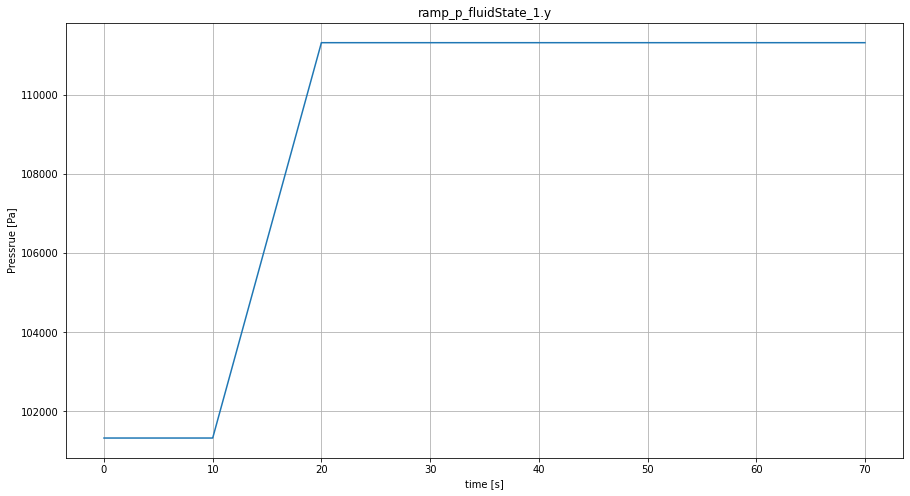

In [8]:
varName="ramp_p_fluidState_1.y"
ylabel='Pressrue [Pa]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var)
plt.title(varName)
plt.grid()
print('------------------------------')

------------------------------


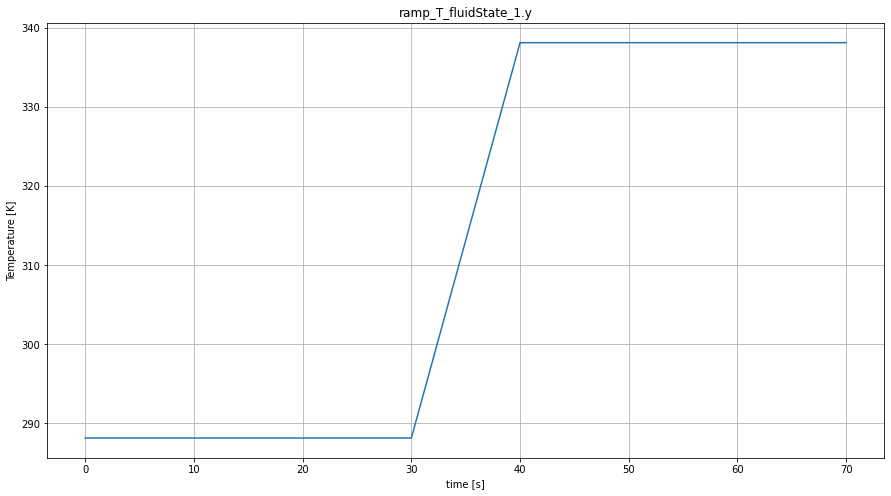

In [9]:
varName="ramp_T_fluidState_1.y"
ylabel='Temperature [K]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var)
plt.title(varName)
plt.grid()
print('------------------------------')

------------------------------


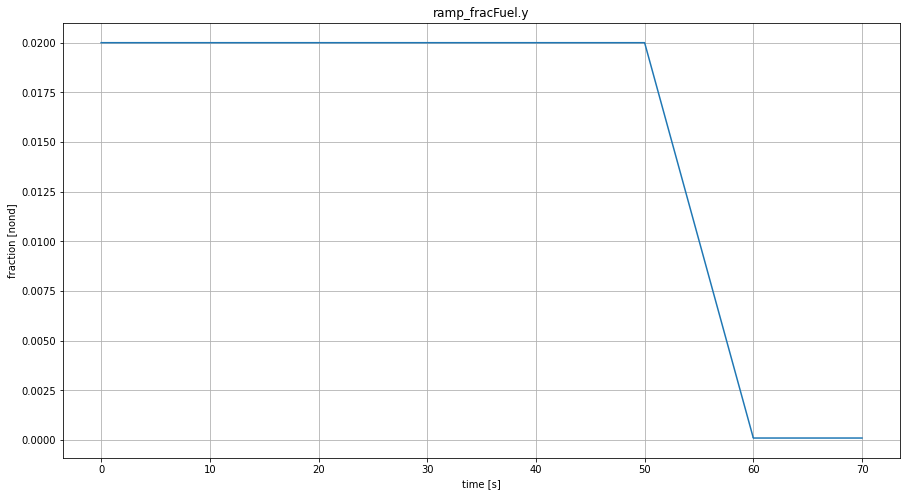

In [10]:
varName="ramp_fracFuel.y"
ylabel='fraction [nond]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var)
plt.title(varName)
plt.grid()
print('------------------------------')

<h2>Outputs</h2>

------------------------------


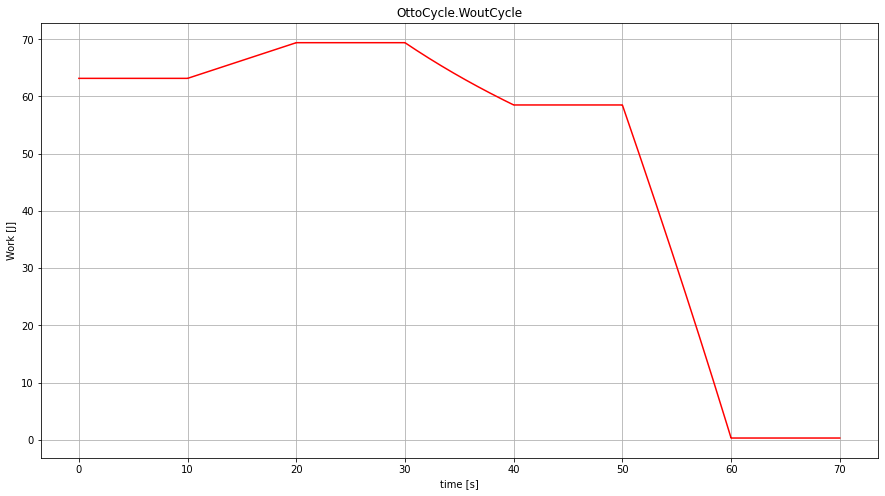

In [11]:
varName="OttoCycle.WoutCycle"
ylabel='Work [J]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var, color='red')
plt.title(varName)
plt.grid()
print('------------------------------')

------------------------------


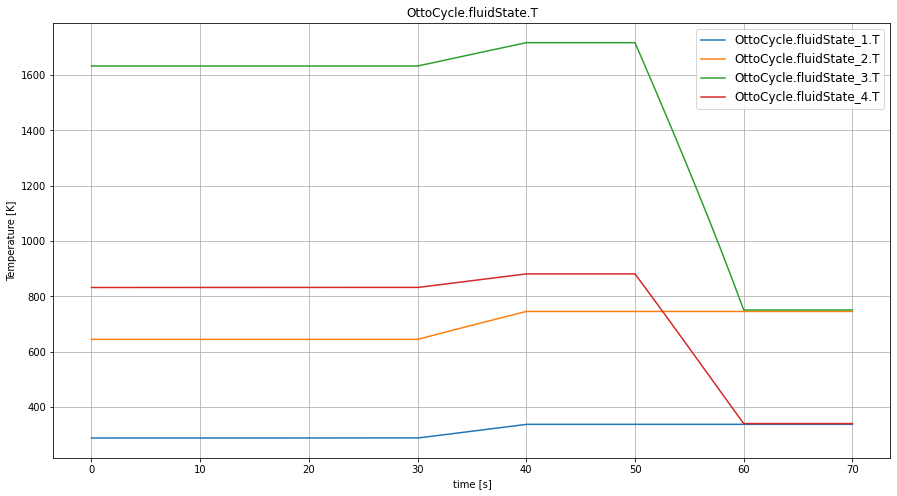

In [12]:
ylabel='Temperature [K]'

fig.append(plt.figure(figsize=(15,8)))
time= df[i_df].loc[:,'time']

varName="OttoCycle.fluidState_1.T"
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=varName)

varName="OttoCycle.fluidState_2.T"
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=varName)

varName="OttoCycle.fluidState_3.T"
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=varName)

varName="OttoCycle.fluidState_4.T"
var= df[i_df].loc[:,varName]
plt.plot(time, var, label=varName)

plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title('OttoCycle.fluidState.T')
plt.legend(loc='upper right', fontsize=12)
plt.grid()
print('------------------------------')

------------------------------


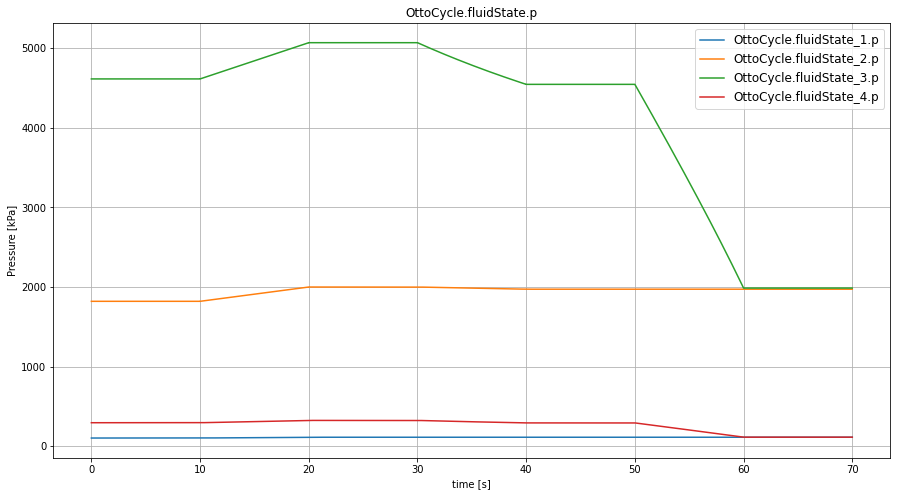

In [13]:
ylabel='Pressure [kPa]'

fig.append(plt.figure(figsize=(15,8)))
time= df[i_df].loc[:,'time']

varName="OttoCycle.fluidState_1.p"
var= df[i_df].loc[:,varName]/1000
plt.plot(time, var, label=varName)

varName="OttoCycle.fluidState_2.p"
var= df[i_df].loc[:,varName]/1000
plt.plot(time, var, label=varName)

varName="OttoCycle.fluidState_3.p"
var= df[i_df].loc[:,varName]/1000
plt.plot(time, var, label=varName)

varName="OttoCycle.fluidState_4.p"
var= df[i_df].loc[:,varName]/1000
plt.plot(time, var, label=varName)

plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.title('OttoCycle.fluidState.p')
plt.legend(loc='upper right', fontsize=12)
plt.grid()
print('------------------------------')

------------------------------


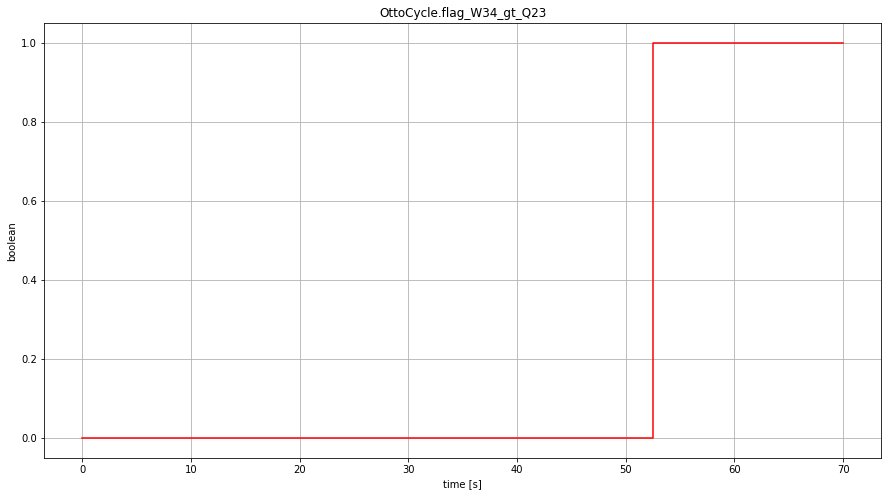

In [14]:
varName="OttoCycle.flag_W34_gt_Q23"
ylabel='boolean'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.plot(time, var, color='red')
plt.title(varName)
plt.grid()
print('------------------------------')

------------------------------


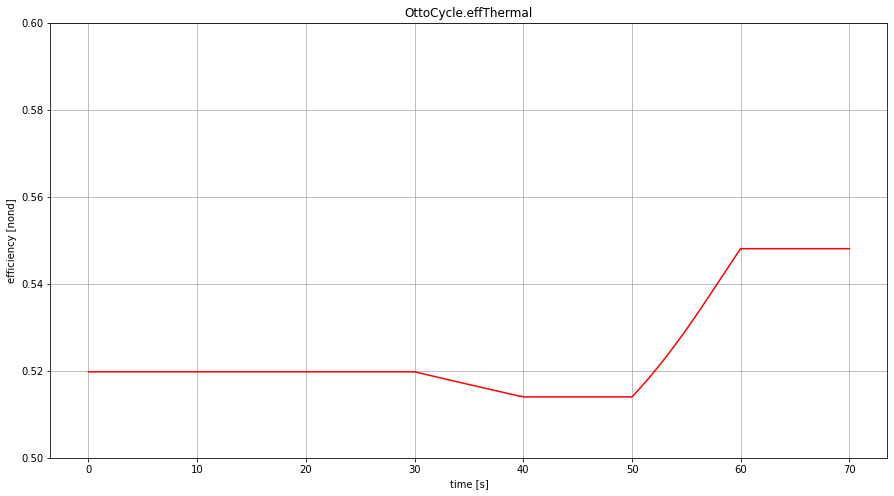

In [15]:
varName="OttoCycle.effThermal"
ylabel='efficiency [nond]'

time= df[i_df].loc[:,'time']
var= df[i_df].loc[:,varName]
fig.append(plt.figure(figsize=(15,8)))
plt.xlabel('time [s]')
plt.ylabel(ylabel)
plt.ylim([0.5,0.6])
plt.plot(time, var, color='red')
plt.title(varName)
plt.grid()
print('------------------------------')

<h2>Extract variables at specified time</h2>

In [16]:
tgtTime=5
widthTime=1

#******************************
rowTgt=0
for i in range(len(df[i_df])):
    if((tgtTime-widthTime <= df[i_df].at[i,'time']) and (df[i_df].at[i,'time'] <= tgtTime) ):
        rowTgt=i
        timeExtrd=df[i_df].at[i,'time']
    ##### end if #####
##### end for #####

print("row extracted = "+str(rowTgt))
print("time of extracted = "+str(timeExtrd))

arr_h=[]
arr_s=[]
arr_p=[]
arr_v=[]
arr_T=[]
arr_u=[]
for i in range(1,5+1):
    val= df[i_df].at[rowTgt, ('OttoCycle.arr_h['+str(i)+']')]
    arr_h.append(val)
    val= df[i_df].at[rowTgt, ('OttoCycle.arr_s['+str(i)+']')]
    arr_s.append(val)
    val= df[i_df].at[rowTgt, ('OttoCycle.arr_p['+str(i)+']')]
    arr_p.append(val)
    val= df[i_df].at[rowTgt, ('OttoCycle.arr_v['+str(i)+']')]
    arr_v.append(val)
    val= df[i_df].at[rowTgt, ('OttoCycle.arr_T['+str(i)+']')]
    arr_T.append(val)
    val= df[i_df].at[rowTgt, ('OttoCycle.arr_u['+str(i)+']')]
    arr_u.append(val)
##### end for #####

nPts= df[i_df].at[rowTgt, ('OttoCycle.curve_hs[1].nPts')]
s_curve_hs=[[]]*4; h_curve_hs=[[]]*4
v_curve_pv=[[]]*4; p_curve_pv=[[]]*4
s_curve_Ts=[[]]*4; T_curve_Ts=[[]]*4
s_curve_us=[[]]*4; u_curve_us=[[]]*4

arrTemp_s_hs=[]; arrTemp_h_hs=[]
arrTemp_s_Ts=[]; arrTemp_T_Ts=[]
arrTemp_s_us=[]; arrTemp_u_us=[]
arrTemp_v_pv=[]; arrTemp_p_pv=[]

for j in range(1, 4+1):
    for i in range(1, nPts+1):
        val=df[i_df].at[rowTgt, ('OttoCycle.curve_hs['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_hs.append(val)
        val=df[i_df].at[rowTgt, ('OttoCycle.curve_hs['+str(j)+'].arr_h['+str(i)+']')]; arrTemp_h_hs.append(val)
        val=df[i_df].at[rowTgt, ('OttoCycle.curve_Ts['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_Ts.append(val)
        val=df[i_df].at[rowTgt, ('OttoCycle.curve_Ts['+str(j)+'].arr_T['+str(i)+']')]; arrTemp_T_Ts.append(val)
        val=df[i_df].at[rowTgt, ('OttoCycle.curve_us['+str(j)+'].arr_s['+str(i)+']')]; arrTemp_s_us.append(val)
        val=df[i_df].at[rowTgt, ('OttoCycle.curve_us['+str(j)+'].arr_u['+str(i)+']')]; arrTemp_u_us.append(val)
        val=df[i_df].at[rowTgt, ('OttoCycle.curve_pv['+str(j)+'].arr_v['+str(i)+']')]; arrTemp_v_pv.append(val)
        val=df[i_df].at[rowTgt, ('OttoCycle.curve_pv['+str(j)+'].arr_p['+str(i)+']')]; arrTemp_p_pv.append(val)
    ##### end for #####
    s_curve_hs[j-1]=arrTemp_s_hs; arrTemp_s_hs=[]
    h_curve_hs[j-1]=arrTemp_h_hs; arrTemp_h_hs=[]
    s_curve_Ts[j-1]=arrTemp_s_Ts; arrTemp_s_Ts=[]
    T_curve_Ts[j-1]=arrTemp_T_Ts; arrTemp_T_Ts=[]
    s_curve_us[j-1]=arrTemp_s_us; arrTemp_s_us=[]
    u_curve_us[j-1]=arrTemp_u_us; arrTemp_u_us=[]
    v_curve_pv[j-1]=arrTemp_v_pv; arrTemp_v_pv=[]
    p_curve_pv[j-1]=arrTemp_p_pv; arrTemp_p_pv=[]
##### end for #####
print('------------------------------')

row extracted = 35
time of extracted = 4.919678714859438
------------------------------


------------------------------


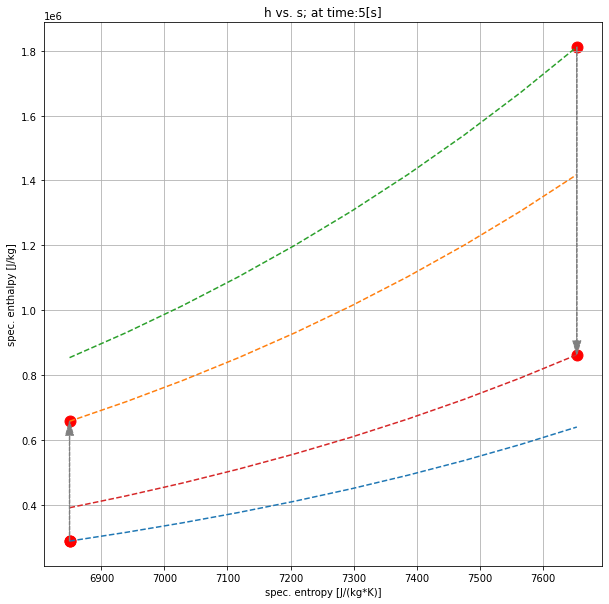

In [17]:
fig.append(plt.figure(figsize=(10,10)))
plt.scatter(x=arr_s, y=arr_h, color='red', s=120)

for i in range(4):
    plt.plot(s_curve_hs[i], h_curve_hs[i], linestyle='dashed')
##### end for #####
plt.grid()
plt.title('h vs. s' + '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('spec. entropy [J/(kg*K)]')
plt.ylabel('spec. enthalpy [J/kg]')
for i in range(0, 4):
    if((i==1-1)or(i==3-1)):
        plt.annotate('', xy=[arr_s[i+1],arr_h[i+1]], xytext=[arr_s[i],arr_h[i]],
                    arrowprops=dict(shrink=0, width=0.5, headwidth=8, headlength=14, connectionstyle='arc3',
                                    facecolor='gray', edgecolor='gray', linestyle='dashed')
                    )
##### end for #####
''''''
print('------------------------------')

------------------------------


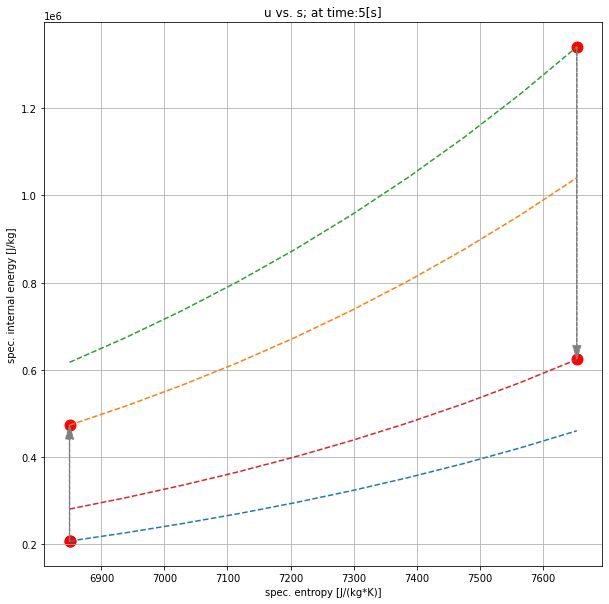

In [18]:
fig.append(plt.figure(figsize=(10,10)))
plt.scatter(x=arr_s, y=arr_u, color='red', s=120)

for i in range(4):
    plt.plot(s_curve_us[i], u_curve_us[i], linestyle='dashed')
##### end for #####
plt.grid()
plt.title('u vs. s' + '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('spec. entropy [J/(kg*K)]')
plt.ylabel('spec. internal energy [J/kg]')

for i in range(0, 4):
    if((i==1-1)or(i==3-1)):
        root=[arr_s[i+1],arr_u[i+1]]
        head=[arr_s[i],arr_u[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.5, headwidth=8, headlength=14, connectionstyle='arc3',
                                    facecolor='gray', edgecolor='gray', linestyle='dashed')
                    )
##### end for #####
''''''
print('------------------------------')

------------------------------


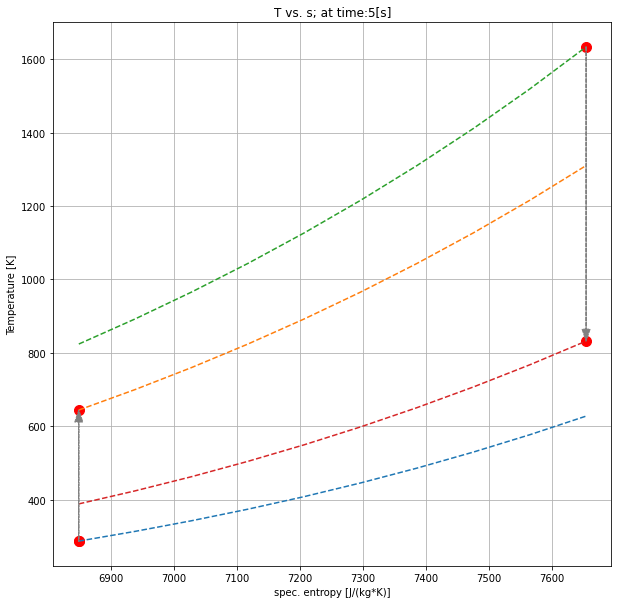

In [19]:
fig.append(plt.figure(figsize=(10,10)))
plt.scatter(x=arr_s, y=arr_T, color='red', s=100)
for i in range(4):
    plt.plot(s_curve_Ts[i], T_curve_Ts[i], linestyle='dashed')
##### end for #####
plt.grid()
plt.title('T vs. s'+ '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('spec. entropy [J/(kg*K)]')
plt.ylabel('Temperature [K]')

for i in range(0, 4):
    if((i==1-1)or(i==3-1)):
        root=[arr_s[i+1],arr_T[i+1]]
        head=[arr_s[i],arr_T[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.5, headwidth=8, headlength=12, connectionstyle='arc3',
                                    facecolor='gray', edgecolor='gray', linestyle='dashed')
                    )
##### end for #####
''''''
print('------------------------------')

------------------------------


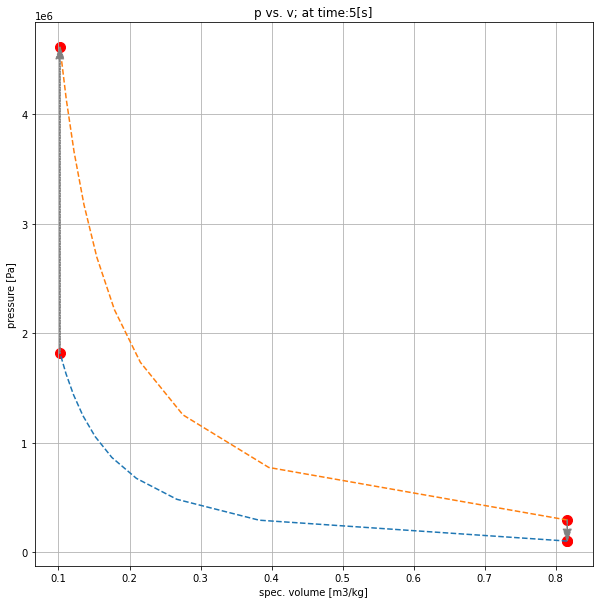

In [20]:
fig.append(plt.figure(figsize=(10,10)))
plt.scatter(x=arr_v, y=arr_p, color='red', s=100)
for i in range(4):
    if((i==1-1)or(i==3-1)):
        plt.plot(v_curve_pv[i], p_curve_pv[i], linestyle='dashed')
##### end for #####
plt.grid()
plt.title('p vs. v'+ '; at time:' + str(tgtTime) + '[s]')
plt.xlabel('spec. volume [m3/kg]')
plt.ylabel('pressure [Pa]')
for i in range(0, 4):
    if((i==2-1)or(i==4-1)):
        root=[arr_v[i+1],arr_p[i+1]]
        head=[arr_v[i],arr_p[i]]
        plt.annotate('', xy=root, xytext=head,
                    arrowprops=dict(shrink=0, width=0.5, headwidth=8, headlength=12, connectionstyle='arc3',
                                    facecolor='gray', edgecolor='gray', linestyle='dashed')
                    )
##### end for #####
''''''
print('------------------------------')

<h1>Process at the end of note</h1>

In [21]:
print("")
os.chdir(pathNotebook)
print("move to directory of notebook")
print("currend dir, back to: "+os.getcwd())
print('------------------------------')


move to directory of notebook
currend dir, back to: C:\Users\grabacr\Dropbox\01-sharedspace\modelica-shared\CustomLib\PropulsionSystem\Jupyter
------------------------------
